# Importing Basic Dependencies

In [263]:
import pandas as pd
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt
%matplotlib inline

In [264]:
df = pd.read_csv('laptop_data.csv')
df.head()

,Unnamed: 0,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080


In [265]:
df.columns

Index(['Unnamed: 0', 'Company', 'TypeName', 'Inches', 'ScreenResolution',
       'Cpu', 'Ram', 'Memory', 'Gpu', 'OpSys', 'Weight', 'Price'],
      dtype='object')

In [266]:
# removing the unnamed: 0 col

df = df[['Company', 'TypeName', 'Inches', 'ScreenResolution',
       'Cpu', 'Ram', 'Memory', 'Gpu', 'OpSys', 'Weight', 'Price']]
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080


In [267]:
df.isnull().sum()

Company             0
TypeName            0
Inches              0
ScreenResolution    0
Cpu                 0
Ram                 0
Memory              0
Gpu                 0
OpSys               0
Weight              0
Price               0
dtype: int64

In [268]:
# checking for duplicated rows

df.duplicated().sum()

29

In [269]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1303 non-null   object 
 1   TypeName          1303 non-null   object 
 2   Inches            1303 non-null   float64
 3   ScreenResolution  1303 non-null   object 
 4   Cpu               1303 non-null   object 
 5   Ram               1303 non-null   object 
 6   Memory            1303 non-null   object 
 7   Gpu               1303 non-null   object 
 8   OpSys             1303 non-null   object 
 9   Weight            1303 non-null   object 
 10  Price             1303 non-null   float64
dtypes: float64(2), object(9)
memory usage: 112.1+ KB


In [270]:
#here object is basically a categorical variable
catvars = df.select_dtypes(include=['object']).columns
numvars = df.select_dtypes(include = ['int32','int64','float32','float64']).columns

catvars,numvars

(Index(['Company', 'TypeName', 'ScreenResolution', 'Cpu', 'Ram', 'Memory',
        'Gpu', 'OpSys', 'Weight'],
       dtype='object'),
 Index(['Inches', 'Price'], dtype='object'))

In [271]:
#This fn is all about the unique value present in the column
def uniquevals(col):
    print(f'Details of the particular col {col} is : {df[col].unique()}')
    
def valuecounts(col):
    print(f'Valuecounts of the particular col {col} is : {df[col].value_counts()}')
    
    
    
    
for col in df.columns:
    uniquevals(col)
    print("-"*75)
#here we can observe that cpu, screen , gpu has lot of text data so we will need to lot of preprocessing for these columns.

Details of the particular col Company is : ['Apple' 'HP' 'Acer' 'Asus' 'Dell' 'Lenovo' 'Chuwi' 'MSI' 'Microsoft'
 'Toshiba' 'Huawei' 'Xiaomi' 'Vero' 'Razer' 'Mediacom' 'Samsung' 'Google'
 'Fujitsu' 'LG']
---------------------------------------------------------------------------
Details of the particular col TypeName is : ['Ultrabook' 'Notebook' 'Netbook' 'Gaming' '2 in 1 Convertible'
 'Workstation']
---------------------------------------------------------------------------
Details of the particular col Inches is : [13.3 15.6 15.4 14.  12.  11.6 17.3 10.1 13.5 12.5 13.  18.4 13.9 12.3
 17.  15.  14.1 11.3]
---------------------------------------------------------------------------
Details of the particular col ScreenResolution is : ['IPS Panel Retina Display 2560x1600' '1440x900' 'Full HD 1920x1080'
 'IPS Panel Retina Display 2880x1800' '1366x768'
 'IPS Panel Full HD 1920x1080' 'IPS Panel Retina Display 2304x1440'
 'IPS Panel Full HD / Touchscreen 1920x1080'
 'Full HD / Touchscreen 19

In [272]:
'''
so on observation we can see that if we remove "GB" from RAM,i can 
make it as an integer value then after,now same goes with Memory as 
well as Weight,for Weight i can classify it as floating variable
using the str.replace() as shown ↓
'''

df['Ram'] = df['Ram'].str.replace('GB','')
df['Weight'] = df['Weight'].str.replace('kg','')

# converting from string->integer for ram column

df['Ram'] = df['Ram'].astype('int32')

# converting from string-> float for the weight column

df['Weight'] = df['Weight'].astype('float32')

df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080


In [273]:
df.info()#here we can see weight and ram have dtye int32

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1303 non-null   object 
 1   TypeName          1303 non-null   object 
 2   Inches            1303 non-null   float64
 3   ScreenResolution  1303 non-null   object 
 4   Cpu               1303 non-null   object 
 5   Ram               1303 non-null   int32  
 6   Memory            1303 non-null   object 
 7   Gpu               1303 non-null   object 
 8   OpSys             1303 non-null   object 
 9   Weight            1303 non-null   float32
 10  Price             1303 non-null   float64
dtypes: float32(1), float64(2), int32(1), object(7)
memory usage: 101.9+ KB


# Exploratory Data Analysis

C:\Users\vivek\AppData\Local\Temp\ipykernel_18164\2553369469.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sn.distplot(df['Price'],color='red')


<AxesSubplot: xlabel='Price', ylabel='Density'>

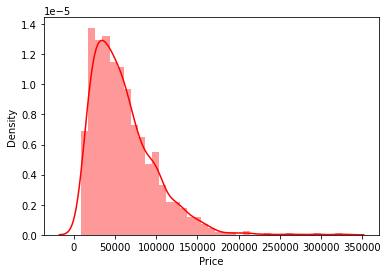

In [274]:
# viewing the distribution of the price column
#Skewed data can cause problems for machine learning algorithms, as they are designed to look 
#for patterns in data. If the data is unbalanced, the algorithm can only learn the patterns of the majority class,
#while completely ignoring the minority class

sn.distplot(df['Price'],color='red')

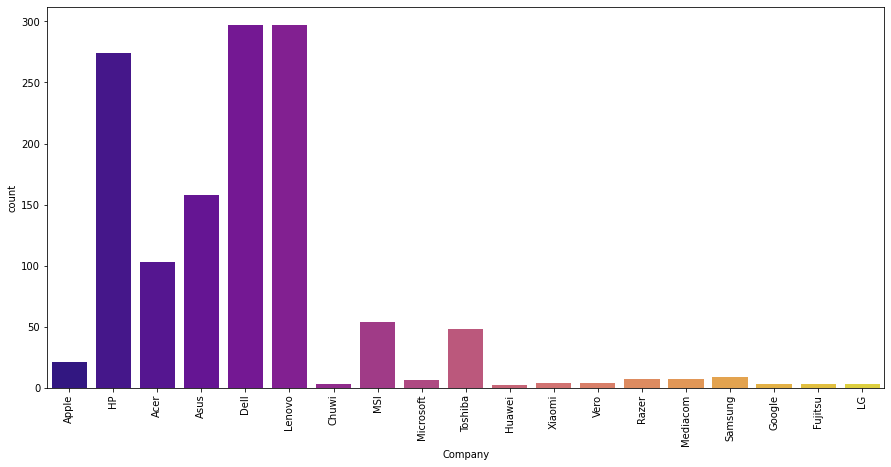

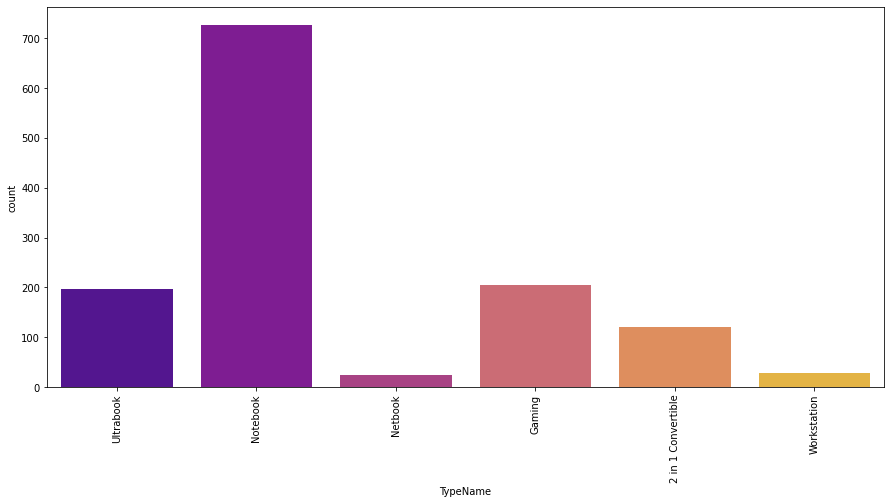

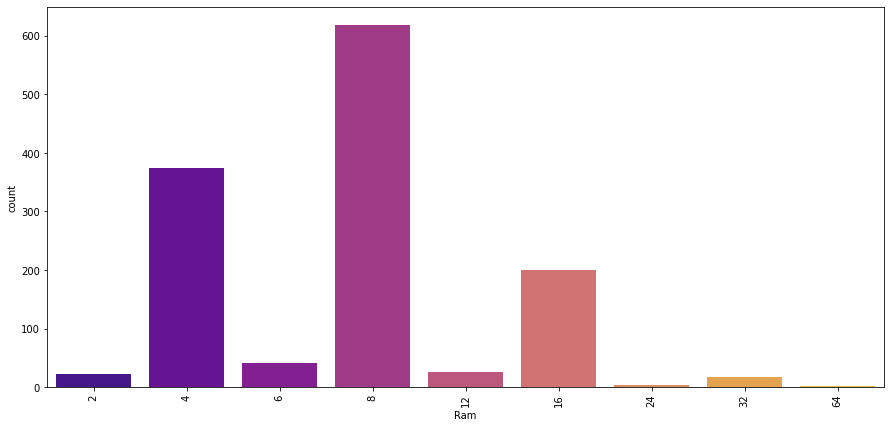

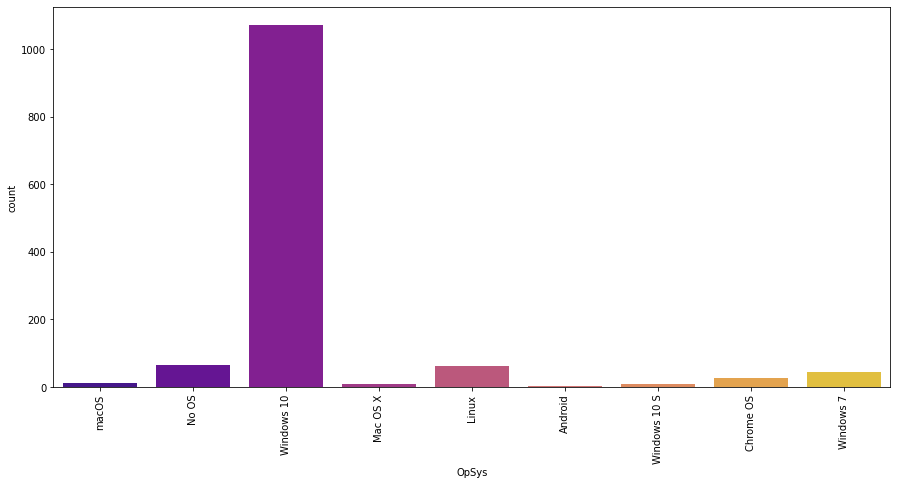

In [275]:
## plotting countplots for the categorical variables

def drawplot(col):
    plt.figure(figsize=(15, 7))
    sn.countplot(data=df, x=col, palette='plasma')
    plt.xticks(rotation='vertical')
    plt.show()

toview = ['Company', 'TypeName', 'Ram', 'OpSys']
for col in toview:
    drawplot(col)

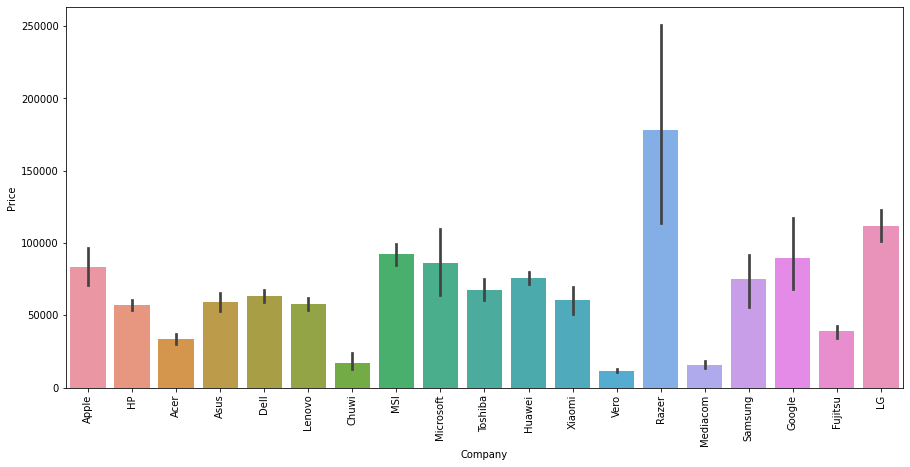

In [276]:
# average price for each of the laptop brands
# this will say us the insight that as per company the price of the laptop vary


plt.figure(figsize=(15,7))
sn.barplot(x = df['Company'],y = df['Price'])
plt.xticks(rotation = 'vertical')
plt.show()

(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'Ultrabook'),
  Text(1, 0, 'Notebook'),
  Text(2, 0, 'Netbook'),
  Text(3, 0, 'Gaming'),
  Text(4, 0, '2 in 1 Convertible'),
  Text(5, 0, 'Workstation')])

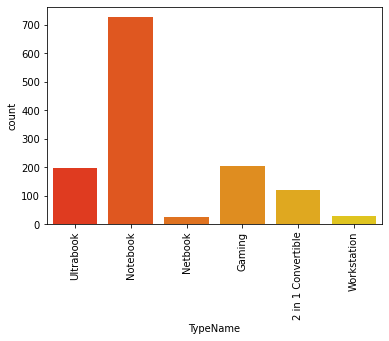

In [277]:
## various types of laptops

sn.countplot(data=df,x=df['TypeName'],palette='autumn')
plt.xticks(rotation = 'vertical')

(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'Ultrabook'),
  Text(1, 0, 'Notebook'),
  Text(2, 0, 'Netbook'),
  Text(3, 0, 'Gaming'),
  Text(4, 0, '2 in 1 Convertible'),
  Text(5, 0, 'Workstation')])

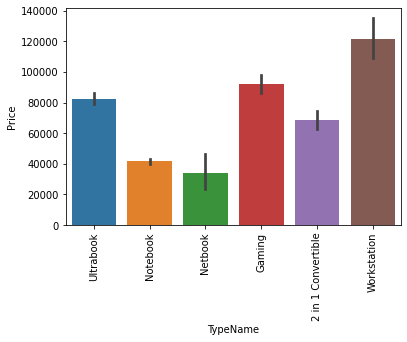

In [278]:
# laptop type and variation about the price 

sn.barplot(x = df['TypeName'],y = df['Price'])
plt.xticks(rotation = 'vertical')

#notebook has very less price variation.Reasonable price is maintained

<AxesSubplot: xlabel='Inches', ylabel='Price'>

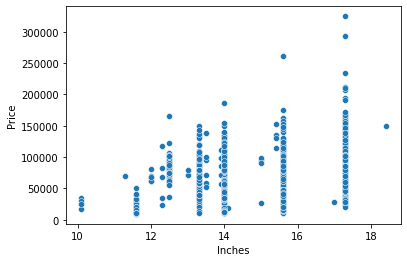

In [279]:
# variation of inches towards the price

sn.scatterplot(x = df['Inches'],y = df['Price'])

**For the `Screen Resolution` column we have many types of Screen Resolutions out there as shown `Touch Screen` and `Normal` and `IPS Panel` are the 3 parts on basis of which we can segregate the things**

In [280]:
df['ScreenResolution'].value_counts()

Full HD 1920x1080                                507
1366x768                                         281
IPS Panel Full HD 1920x1080                      230
IPS Panel Full HD / Touchscreen 1920x1080         53
Full HD / Touchscreen 1920x1080                   47
1600x900                                          23
Touchscreen 1366x768                              16
Quad HD+ / Touchscreen 3200x1800                  15
IPS Panel 4K Ultra HD 3840x2160                   12
IPS Panel 4K Ultra HD / Touchscreen 3840x2160     11
4K Ultra HD / Touchscreen 3840x2160               10
4K Ultra HD 3840x2160                              7
Touchscreen 2560x1440                              7
IPS Panel 1366x768                                 7
IPS Panel Quad HD+ / Touchscreen 3200x1800         6
IPS Panel Retina Display 2560x1600                 6
IPS Panel Retina Display 2304x1440                 6
Touchscreen 2256x1504                              6
IPS Panel Touchscreen 2560x1440               

In [281]:
# creating a new col,touchscreen if the value is 1 that laptop is touch screen

df['TouchScreen'] = df['ScreenResolution'].apply(lambda element:1 
                                                      if 'Touchscreen' in element else 0)

df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,TouchScreen
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0


In [282]:
#sample will randomly select some data set and show you
df.sample(5)

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,TouchScreen
32,HP,Notebook,17.3,Full HD 1920x1080,AMD A6-Series 9220 2.5GHz,4,500GB HDD,AMD Radeon 530,Windows 10,2.71,23389.9200,0
21,Lenovo,Gaming,15.6,IPS Panel Full HD 1920x1080,Intel Core i5 7300HQ 2.5GHz,8,128GB SSD + 1TB HDD,Nvidia GeForce GTX 1050,Windows 10,2.50,53226.7200,0
485,Lenovo,Notebook,14.0,IPS Panel Full HD 1920x1080,Intel Core i5 8250U 1.6GHz,8,256GB SSD,Intel UHD Graphics 620,Windows 10,1.75,55890.7200,0
69,Asus,Gaming,17.3,Full HD 1920x1080,Intel Core i7 7700HQ 2.8GHz,12,1TB HDD,Nvidia GeForce GTX 1050 Ti,Linux,3.00,50562.7200,0
818,Dell,Gaming,17.3,IPS Panel Full HD 1920x1080,Intel Core i7 7700HQ 2.8GHz,16,128GB SSD + 1TB HDD,Nvidia GeForce GTX 1060,Windows 10,4.36,133467.4656,0


<AxesSubplot: xlabel='TouchScreen', ylabel='count'>

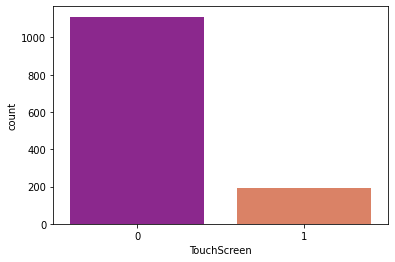

In [283]:
sn.countplot(data=df,x=df['TouchScreen'],palette='plasma')

(array([0, 1]), [Text(0, 0, '0'), Text(1, 0, '1')])

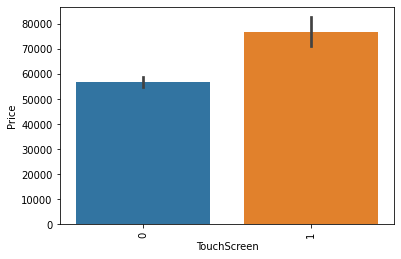

In [284]:
# touch screen on comparision with price of laptop

sn.barplot(x = df['TouchScreen'],y = df['Price'])
plt.xticks(rotation = 'vertical')

In [285]:
# creating a new col named IPS,does the laptop have IPS facility or not

df['IPS'] = df['ScreenResolution'].apply(
    lambda element:1 if "IPS" in element else 0
)
df.sample(5)

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,TouchScreen,IPS
921,HP,Ultrabook,15.6,Full HD 1920x1080,Intel Core i7 6500U 2.5GHz,8,256GB SSD,AMD Radeon R7 M365X,Windows 10,1.84,69103.6272,0,0
884,Dell,Notebook,15.6,1366x768,Intel Pentium Quad Core N3710 1.6GHz,4,500GB HDD,Intel HD Graphics,Windows 10,2.20,19660.3200,0,0
578,MSI,Gaming,17.3,Full HD 1920x1080,Intel Core i7 7820HK 2.9GHz,16,512GB SSD + 1TB HDD,Nvidia GeForce GTX 1070,Windows 10,4.14,145401.1200,0,0
1131,Lenovo,2 in 1 Convertible,14.0,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i7 6600U 2.6GHz,8,512GB SSD,Nvidia Quadro M500M,Windows 7,1.80,109244.2464,1,1
350,Dell,Notebook,15.6,4K Ultra HD / Touchscreen 3840x2160,Intel Core i7 7700HQ 2.8GHz,16,512GB SSD,Nvidia GeForce GTX 1050,Windows 10,2.06,108020.9376,1,0


<AxesSubplot: xlabel='IPS', ylabel='count'>

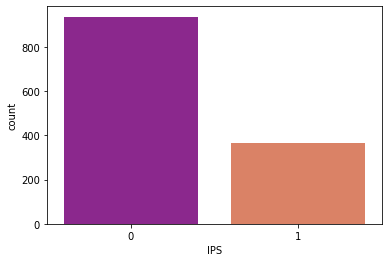

In [286]:
sn.countplot(data=df,x=df['IPS'],palette='plasma')

(array([0, 1]), [Text(0, 0, '0'), Text(1, 0, '1')])

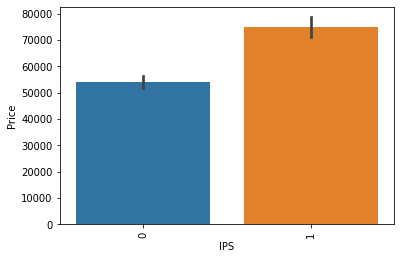

In [287]:
# price variation with respect to the IPS col

sn.barplot(x = df['IPS'],y = df['Price'])
plt.xticks(rotation = 'vertical')

### Extracting the X Resolution and the Y Resolution

In [288]:
# we will split the text at the "x" letter and seperate the 2 parts
# from this we can observe that one of the col is Y res we need to do
# some feature engineering on the X res col

splitdf = df['ScreenResolution'].str.split('x',n = 1,expand=True)
splitdf.head()

,0,1
0,IPS Panel Retina Display 2560,1600
1,1440,900
2,Full HD 1920,1080
3,IPS Panel Retina Display 2880,1800
4,IPS Panel Retina Display 2560,1600


In [289]:
splitdf = df['ScreenResolution'].str.split('x',n = 1,expand=True)#then using expand=True, the split elements will expand out into separate columns. If NaN is present, it is propagated throughout the columns during the split.
#n parameter is used to limit the no. of string after the delimeter
df['X_res'] = splitdf[0]
df['Y_res'] = splitdf[1]
df.sample(10)

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,TouchScreen,IPS,X_res,Y_res
342,HP,Notebook,15.6,IPS Panel Full HD 1920x1080,Intel Core i3 7100U 2.4GHz,8,1TB HDD,Nvidia GeForce 930MX,Windows 10,2.10,38148.480,0,1,IPS Panel Full HD 1920,1080
139,HP,Notebook,13.3,IPS Panel Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,4,256GB SSD,Intel HD Graphics 620,Windows 10,1.32,37242.720,0,1,IPS Panel Full HD 1920,1080
8,Asus,Ultrabook,14.0,Full HD 1920x1080,Intel Core i7 8550U 1.8GHz,16,512GB SSD,Nvidia GeForce MX150,Windows 10,1.30,79653.600,0,0,Full HD 1920,1080
320,HP,Notebook,14.0,Full HD 1920x1080,Intel Core i7 7500U 2.7GHz,8,256GB SSD,Intel HD Graphics 620,Windows 10,1.48,68837.760,0,0,Full HD 1920,1080
459,HP,Notebook,17.3,1600x900,Intel Core i3 6006U 2GHz,8,256GB SSD,Intel HD Graphics 520,Windows 10,2.50,34093.872,0,0,1600,900
969,Lenovo,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,6,256GB SSD,Nvidia GeForce 920MX,Windows 10,2.40,37029.600,0,0,Full HD 1920,1080
888,Acer,Netbook,11.6,IPS Panel 1366x768,Intel Celeron Dual Core N3060 1.6GHz,4,32GB Flash Storage,Intel HD Graphics 400,Chrome OS,1.25,15824.160,0,1,IPS Panel 1366,768
371,Acer,Notebook,15.6,1366x768,AMD A9-Series 9420 3GHz,4,128GB SSD,AMD Radeon R5,Windows 10,2.10,22697.280,0,0,1366,768
1093,Dell,Ultrabook,13.3,IPS Panel Full HD 1920x1080,Intel Core i5 8250U 1.6GHz,4,256GB SSD,AMD Radeon 530,Windows 10,1.40,43601.688,0,1,IPS Panel Full HD 1920,1080
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.000,0,0,Full HD 1920,1080


In [290]:
''''So basically from that whole text of the X_res col,we need to 
extract the digits from it,'''

df['X_res'] = df['X_res'].str.replace(',','').str.findall(r'(\d+\.?\d+)').apply(lambda x:x[0])

df.sample(10)

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,TouchScreen,IPS,X_res,Y_res
52,HP,Notebook,15.6,Full HD 1920x1080,AMD A6-Series 9220 2.5GHz,4,256GB SSD,AMD Radeon R4 Graphics,Windows 10,1.86,21231.5472,0,0,1920,1080
488,Lenovo,Ultrabook,12.5,IPS Panel Full HD 1920x1080,Intel Core i7 7500U 2.7GHz,16,512GB SSD,Intel HD Graphics 620,Windows 10,1.36,95797.4400,0,1,1920,1080
1239,Lenovo,Notebook,13.3,IPS Panel Full HD 1920x1080,Intel Core i7 7500U 2.7GHz,16,512GB SSD,Intel HD Graphics 620,Windows 10,1.40,79866.7200,0,1,1920,1080
732,HP,Notebook,15.6,Full HD 1920x1080,AMD A9-Series A9-9420 3GHz,6,128GB SSD + 1TB HDD,AMD Radeon 520,Windows 10,2.10,34632.0000,0,0,1920,1080
904,Lenovo,Notebook,15.6,IPS Panel Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,512GB SSD,Intel HD Graphics 620,Windows 10,1.95,104588.1072,0,1,1920,1080
709,HP,Notebook,17.3,IPS Panel Full HD 1920x1080,AMD A10-Series 9620P 2.5GHz,6,2TB HDD,AMD Radeon 530,Windows 10,2.71,34898.9328,0,1,1920,1080
498,Lenovo,Notebook,13.3,IPS Panel Full HD 1920x1080,Intel Core i3 7100U 2.4GHz,8,256GB SSD,Intel HD Graphics 620,Windows 10,1.40,50562.7200,0,1,1920,1080
240,Lenovo,Notebook,15.6,1366x768,Intel Core i3 6006U 2GHz,8,128GB SSD,Intel HD Graphics 520,Windows 10,2.20,31381.9200,0,0,1366,768
501,HP,Notebook,15.6,1366x768,Intel Core i5 7200U 2.5GHz,8,256GB SSD,AMD Radeon 520,Windows 10,1.91,32979.7872,0,0,1366,768
521,HP,Ultrabook,13.3,IPS Panel Full HD 1920x1080,Intel Core i7 7500U 2.7GHz,8,256GB SSD,Intel HD Graphics 620,Windows 10,1.32,74538.7200,0,1,1920,1080


In [291]:
df['X_res'] = df['X_res'].astype('int')
df['Y_res'] = df['Y_res'].astype('int')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1303 non-null   object 
 1   TypeName          1303 non-null   object 
 2   Inches            1303 non-null   float64
 3   ScreenResolution  1303 non-null   object 
 4   Cpu               1303 non-null   object 
 5   Ram               1303 non-null   int32  
 6   Memory            1303 non-null   object 
 7   Gpu               1303 non-null   object 
 8   OpSys             1303 non-null   object 
 9   Weight            1303 non-null   float32
 10  Price             1303 non-null   float64
 11  TouchScreen       1303 non-null   int64  
 12  IPS               1303 non-null   int64  
 13  X_res             1303 non-null   int32  
 14  Y_res             1303 non-null   int32  
dtypes: float32(1), float64(2), int32(3), int64(2), object(7)
memory usage: 132.5+ KB


C:\Users\vivek\AppData\Local\Temp\ipykernel_18164\3653952722.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sn.heatmap(df.corr(),annot=True,cmap='plasma')


<AxesSubplot: >

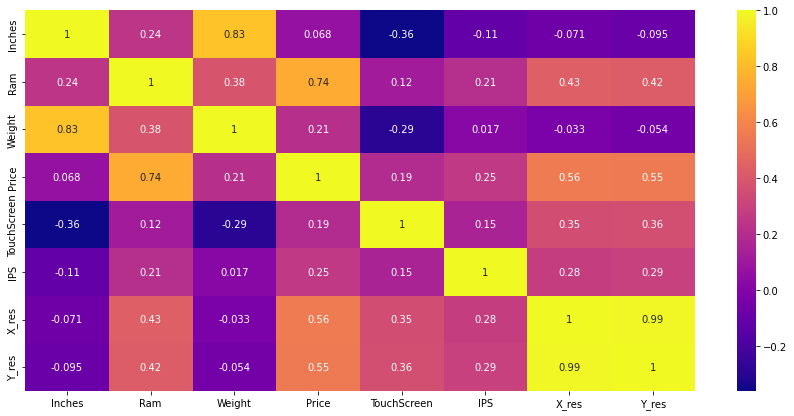

In [292]:
plt.figure(figsize=(15,7))
sn.heatmap(df.corr(),annot=True,cmap='plasma')
#here we can see price is highly corelated with Ram and resolution

In [293]:
df.corr()['Price']

C:\Users\vivek\AppData\Local\Temp\ipykernel_18164\815546952.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()['Price']


Inches         0.068197
Ram            0.743007
Weight         0.210370
Price          1.000000
TouchScreen    0.191226
IPS            0.252208
X_res          0.556529
Y_res          0.552809
Name: Price, dtype: float64

**From the correlation plot we observed that as the X_res and Y_res is increasing,the price of the laptop is also increasing,so `X_res and Y_res` are positively correlated and they are giving much information,so that is the reason why i had splitted `Resolution` column into `X_res and Y_res` columns respectively**

**So to make things good,we can create a new column named `PPI{pixels per inch}`,now  as we saw from the correlation plot that the `X_res and Y_res` are having much collinearity,so why not combine them with `Inches` which is having less collinearity,so we will combine them as follows ↓,so here is the formula of how to calculate `PPI` {pixels per inch}  In linear regression models, multicollinearity (high collinearity among predictor variables) can lead to unstable coefficient estimates. It becomes difficult to distinguish the individual effect of each predictor on the target variable when they are highly correlated. This can affect the interpretability of the model.**

$$
    PPI(pixels per inch) = \frac{\sqrt{X_resolution^2+Y_resolution^2}}{inches}
$$

In [294]:
df['PPI'] = (((df['X_res']**2+df['Y_res']**2))**0.5/df['Inches']).astype('float')
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,TouchScreen,IPS,X_res,Y_res,PPI
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,2560,1600,226.983005
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,1440,900,127.677940
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,1920,1080,141.211998
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,2880,1800,220.534624
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,2560,1600,226.983005


In [295]:
df.corr()['Price']

C:\Users\vivek\AppData\Local\Temp\ipykernel_18164\815546952.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()['Price']


Inches         0.068197
Ram            0.743007
Weight         0.210370
Price          1.000000
TouchScreen    0.191226
IPS            0.252208
X_res          0.556529
Y_res          0.552809
PPI            0.473487
Name: Price, dtype: float64

**So as we observe from the correlation data that the `PPI` is having good correlation,so we will be using that,as that is a combination of 3 features and that gives collective results of 3 columns,so we will drop `Inches,X_res,Y_res` as well**

In [296]:
df.drop(columns=['ScreenResolution','Inches','X_res','Y_res'],inplace=True)
df.head()

,Company,TypeName,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,TouchScreen,IPS,PPI
0,Apple,Ultrabook,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005
1,Apple,Ultrabook,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940
2,HP,Notebook,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211998
3,Apple,Ultrabook,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,220.534624
4,Apple,Ultrabook,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,226.983005


**Now we will work on `CPU` column,as that also has much text data and we need to process it efficiently as we may get good insights from them**

In [297]:
df['Cpu'].value_counts()

Intel Core i5 7200U 2.5GHz       190
Intel Core i7 7700HQ 2.8GHz      146
Intel Core i7 7500U 2.7GHz       134
Intel Core i7 8550U 1.8GHz        73
Intel Core i5 8250U 1.6GHz        72
                                ... 
Intel Core M M3-6Y30 0.9GHz        1
AMD A9-Series 9420 2.9GHz          1
Intel Core i3 6006U 2.2GHz         1
AMD A6-Series 7310 2GHz            1
Intel Xeon E3-1535M v6 3.1GHz      1
Name: Cpu, Length: 118, dtype: int64

**Most common processors are made by intel right,so we will be clustering their `processors` into different categories like `i5,i7,other`,now other means the processors of intel which do not have i3,i5 or i7 attached to it,they're completely different so that's the reason i will clutter them into `other` and other category is `AMD` which is a different category in whole**

**So if we observe we need to extract the first 3 words of the CPU column,as the first 3 words of every row under the CPU col is the type of the CPU,so we will be using them as shown ↓**

In [298]:
text='intel core i5 50hz'
','.join(text.split()[:3])

'intel,core,i5'

In [299]:
df['CPU_name'] = df['Cpu'].apply(lambda text:" ".join(text.split()[:3]))
df.head()
#here lambda fn means:for every text in df['cpu']

,Company,TypeName,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,TouchScreen,IPS,PPI,CPU_name
0,Apple,Ultrabook,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5
1,Apple,Ultrabook,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5
2,HP,Notebook,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211998,Intel Core i5
3,Apple,Ultrabook,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,220.534624,Intel Core i7
4,Apple,Ultrabook,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,226.983005,Intel Core i5


In [300]:
'''
As mentioned earlier,if we get any of the intel `i3,i5 or i7` versions
we will return them as it is,but if we get any other processor
we will first check whether is that a variant of the intel? or not
if yes,then we will tag it as "Other Intel Processor" else we will
say it as `AMD Processor`

'''

def processortype(text):
    
    if text=='Intel Core i7' or text=='Intel Core i5' or text=='Intel Core i3':
        return text
    
    else:
        if text.split()[0]=='Intel':
            return 'Other Intel Processor'
        
        else:
            return 'AMD Processor'
        
    
    
df['CPU_name'] = df['CPU_name'].apply(lambda text:processortype(text))
df.sample(5)

,Company,TypeName,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,TouchScreen,IPS,PPI,CPU_name
750,Lenovo,Netbook,Intel Celeron Dual Core N3060 1.6GHz,4,128GB SSD,Intel HD Graphics 400,Windows 10,1.40,25308.00,1,0,135.094211,Other Intel Processor
265,Dell,2 in 1 Convertible,Intel Core i5 8250U 1.6GHz,8,256GB SSD,Intel UHD Graphics 620,Windows 10,2.67,42570.72,1,0,141.211998,Intel Core i5
1180,Lenovo,2 in 1 Convertible,Intel Core i5 6200U 2.3GHz,8,256GB SSD,Intel HD Graphics 520,Windows 10,1.36,87219.36,1,1,209.800683,Intel Core i5
149,Acer,Notebook,Intel Core i3 6006U 2GHz,4,1TB HDD,Intel HD Graphics 520,Windows 10,2.10,23816.16,0,0,100.454670,Intel Core i3
644,Acer,Notebook,Intel Core i3 6006U 2GHz,4,500GB HDD,Intel HD Graphics 520,Windows 10,2.40,23976.00,0,0,100.454670,Intel Core i3


(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'Intel Core i5'),
  Text(1, 0, 'Intel Core i7'),
  Text(2, 0, 'AMD Processor'),
  Text(3, 0, 'Intel Core i3'),
  Text(4, 0, 'Other Intel Processor')])

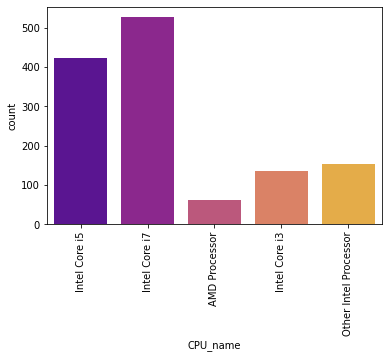

In [301]:
sn.countplot(data=df,x=df['CPU_name'],palette='plasma')
plt.xticks(rotation = 'vertical')

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'Intel Core i5'),
  Text(1, 0, 'Intel Core i7'),
  Text(2, 0, 'AMD Processor'),
  Text(3, 0, 'Intel Core i3'),
  Text(4, 0, 'Other Intel Processor')])

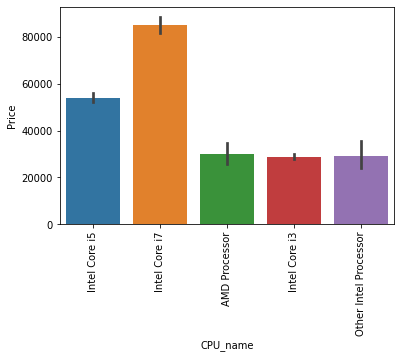

In [302]:
# price vs processor variation

sn.barplot(x=df['CPU_name'],y=df['Price'])
plt.xticks(rotation = 'vertical')

In [303]:
## dropping the cpu column

df.drop(columns=['Cpu'],inplace=True)
df.head()

,Company,TypeName,Ram,Memory,Gpu,OpSys,Weight,Price,TouchScreen,IPS,PPI,CPU_name
0,Apple,Ultrabook,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5
1,Apple,Ultrabook,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5
2,HP,Notebook,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211998,Intel Core i5
3,Apple,Ultrabook,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,220.534624,Intel Core i7
4,Apple,Ultrabook,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,226.983005,Intel Core i5


##### Analysis on the RAM column

<AxesSubplot: xlabel='Ram', ylabel='count'>

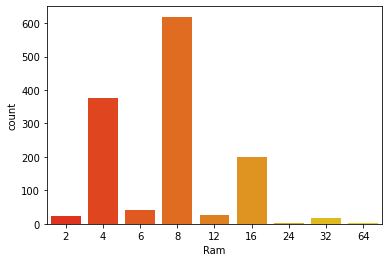

In [304]:
sn.countplot(data=df,x=df['Ram'],palette='autumn')

<AxesSubplot: xlabel='Ram', ylabel='Price'>

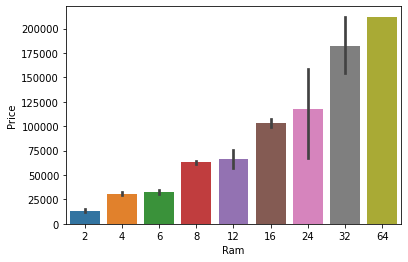

In [305]:
## ram is having good relation with price

sn.barplot(x=df['Ram'],y=df['Price'])

##### About the memory column

**We will seperate the `Type` of memory and the value of it,just similar to the one which is done in the previous part**

**This part involves things which are needed to be done in steps,so here we do not have the memory as a complete we have it in different dimension as `128GB SSD +  1TB HDD`,so inorder to for it come in a same dimension we need to do some modifications which are done below as shown**

In [306]:
#df.head()
df['Memory'].iloc[:1][0]

'128GB SSD'

In [307]:
# we have different categories and also different kinds of variations 

df['Memory'].value_counts()

256GB SSD                        412
1TB HDD                          223
500GB HDD                        132
512GB SSD                        118
128GB SSD +  1TB HDD              94
128GB SSD                         76
256GB SSD +  1TB HDD              73
32GB Flash Storage                38
2TB HDD                           16
64GB Flash Storage                15
512GB SSD +  1TB HDD              14
1TB SSD                           14
256GB SSD +  2TB HDD              10
1.0TB Hybrid                       9
256GB Flash Storage                8
16GB Flash Storage                 7
32GB SSD                           6
180GB SSD                          5
128GB Flash Storage                4
512GB SSD +  2TB HDD               3
16GB SSD                           3
512GB Flash Storage                2
1TB SSD +  1TB HDD                 2
256GB SSD +  500GB HDD             2
128GB SSD +  2TB HDD               2
256GB SSD +  256GB SSD             2
512GB SSD +  256GB SSD             1
5

In [308]:
## 4 most common variants observed : HHD,SSD,Flash,Hybrid

# this expression will remove the decimal space for example 1.0 TB will be 1TB

df['Memory'] = df['Memory'].astype(str).replace('\.0','',regex = True)#regex =True means we do this for every data in column

# replace the GB word with " "

df['Memory'] = df['Memory'].str.replace('GB','')

# replace the TB word with "000"

df['Memory'] = df['Memory'].str.replace('TB','000')

# split the word accross the "+" character

newdf = df['Memory'].str.split("+",n = 1,expand = True)

newdf

,0,1
0,128 SSD,None
1,128 Flash Storage,None
2,256 SSD,None
3,512 SSD,None
4,256 SSD,None
...,...,...
1298,128 SSD,None
1299,512 SSD,None
1300,64 Flash Storage,None
1301,1000 HDD,None


In [309]:
# we will strip up all the white spaces,basically eliminating white space

df['first'] = newdf[0]
df['first'] = df['first'].str.strip()
df.head()

,Company,TypeName,Ram,Memory,Gpu,OpSys,Weight,Price,TouchScreen,IPS,PPI,CPU_name,first
0,Apple,Ultrabook,8,128 SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5,128 SSD
1,Apple,Ultrabook,8,128 Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5,128 Flash Storage
2,HP,Notebook,8,256 SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211998,Intel Core i5,256 SSD
3,Apple,Ultrabook,16,512 SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,220.534624,Intel Core i7,512 SSD
4,Apple,Ultrabook,8,256 SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,226.983005,Intel Core i5,256 SSD


In [310]:
def applychanges(value):
    
    df['Layer1'+value] = df['first'].apply(lambda x:1 if value in x else 0)
    
    
listtoapply = ['HDD','SSD','Hybrid','FlashStorage']    
for value in listtoapply:
    applychanges(value)
    
    
df.head()

,Company,TypeName,Ram,Memory,Gpu,OpSys,Weight,Price,TouchScreen,IPS,PPI,CPU_name,first,Layer1HDD,Layer1SSD,Layer1Hybrid,Layer1FlashStorage
0,Apple,Ultrabook,8,128 SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5,128 SSD,0,1,0,0
1,Apple,Ultrabook,8,128 Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5,128 Flash Storage,0,0,0,0
2,HP,Notebook,8,256 SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211998,Intel Core i5,256 SSD,0,1,0,0
3,Apple,Ultrabook,16,512 SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,220.534624,Intel Core i7,512 SSD,0,1,0,0
4,Apple,Ultrabook,8,256 SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,226.983005,Intel Core i5,256 SSD,0,1,0,0


In [311]:
# remove all the characters just keep the numbers

df['first'] = df['first'].str.replace(r'\D','') 
df['first'].value_counts()

C:\Users\vivek\AppData\Local\Temp\ipykernel_18164\2268326293.py:3: FutureWarning: The default value of regex will change from True to False in a future version.
  df['first'] = df['first'].str.replace(r'\D','')


256     508
1000    250
128     177
512     140
500     132
32       45
64       17
2000     16
16       10
180       5
240       1
8         1
508       1
Name: first, dtype: int64

In [312]:
df['Second'] = newdf[1]
df.head()


,Company,TypeName,Ram,Memory,Gpu,OpSys,Weight,Price,TouchScreen,IPS,PPI,CPU_name,first,Layer1HDD,Layer1SSD,Layer1Hybrid,Layer1FlashStorage,Second
0,Apple,Ultrabook,8,128 SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5,128,0,1,0,0,None
1,Apple,Ultrabook,8,128 Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5,128,0,0,0,0,None
2,HP,Notebook,8,256 SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211998,Intel Core i5,256,0,1,0,0,None
3,Apple,Ultrabook,16,512 SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,220.534624,Intel Core i7,512,0,1,0,0,None
4,Apple,Ultrabook,8,256 SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,226.983005,Intel Core i5,256,0,1,0,0,None


In [313]:
def applychanges1(value):
    
    df['Layer2'+value] = df['Second'].apply(lambda x:1 if value in x else 0)
    
    
listtoapply1 = ['HDD','SSD','Hybrid','FlashStorage']
df['Second'] = df['Second'].fillna("0")
for value in listtoapply1:
    applychanges1(value)
    

# remove all the characters just keep the numbers

df['Second'] = df['Second'].str.replace(r'\D','')
df['Second'].value_counts()

C:\Users\vivek\AppData\Local\Temp\ipykernel_18164\2034917926.py:14: FutureWarning: The default value of regex will change from True to False in a future version.
  df['Second'] = df['Second'].str.replace(r'\D','')


0       1095
1000     187
2000      15
256        3
500        2
512        1
Name: Second, dtype: int64

In [314]:
df['first'] = df['first'].astype('int')
df['Second'] = df['Second'].astype('int')
df.head()

,Company,TypeName,Ram,Memory,Gpu,OpSys,Weight,Price,TouchScreen,IPS,...,first,Layer1HDD,Layer1SSD,Layer1Hybrid,Layer1FlashStorage,Second,Layer2HDD,Layer2SSD,Layer2Hybrid,Layer2FlashStorage
0,Apple,Ultrabook,8,128 SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,...,128,0,1,0,0,0,0,0,0,0
1,Apple,Ultrabook,8,128 Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,...,128,0,0,0,0,0,0,0,0,0
2,HP,Notebook,8,256 SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,...,256,0,1,0,0,0,0,0,0,0
3,Apple,Ultrabook,16,512 SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,...,512,0,1,0,0,0,0,0,0,0
4,Apple,Ultrabook,8,256 SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,...,256,0,1,0,0,0,0,0,0,0


In [315]:
# multiplying the elements and storing the result in subsequent columns


df["HDD"]=(df["first"]*df["Layer1HDD"]+df["Second"]*df["Layer2HDD"])
df["SSD"]=(df["first"]*df["Layer1SSD"]+df["Second"]*df["Layer2SSD"])
df["Hybrid"]=(df["first"]*df["Layer1Hybrid"]+df["Second"]*df["Layer2Hybrid"])
df["Flash_Storage"]=(df["first"]*df["Layer1FlashStorage"]+df["Second"]*df["Layer2FlashStorage"])


## dropping of uncessary columns

df.drop(columns=['first', 'Second', 'Layer1HDD', 'Layer1SSD', 'Layer1Hybrid',
       'Layer1FlashStorage', 'Layer2HDD', 'Layer2SSD', 'Layer2Hybrid',
       'Layer2FlashStorage'],inplace=True)

In [316]:
df.sample(5)

,Company,TypeName,Ram,Memory,Gpu,OpSys,Weight,Price,TouchScreen,IPS,PPI,CPU_name,HDD,SSD,Hybrid,Flash_Storage
405,Asus,Ultrabook,8,512 SSD,Intel HD Graphics 620,Windows 10,1.10,99793.440,0,0,157.350512,Intel Core i7,0,512,0,0
767,Dell,Gaming,16,128 SSD + 1000 HDD,Nvidia GeForce GTX 960M,Windows 10,2.72,58554.720,1,1,282.423996,Intel Core i7,1000,128,0,0
435,Asus,Gaming,8,256 SSD + 1000 HDD,AMD Radeon RX 580,Windows 10,3.20,90309.600,0,0,127.335675,AMD Processor,1000,256,0,0
612,Dell,Notebook,4,1000 HDD,Intel HD Graphics 520,Linux,2.18,23650.992,0,0,100.454670,Intel Core i3,1000,0,0,0
781,Asus,Gaming,16,256 SSD + 1000 HDD,Nvidia GeForce GTX 1070,Windows 10,4.30,125208.000,0,1,127.335675,Intel Core i7,1000,256,0,0


In [317]:
df.drop(columns=['Memory'],inplace=True)
df.sample(5)

,Company,TypeName,Ram,Gpu,OpSys,Weight,Price,TouchScreen,IPS,PPI,CPU_name,HDD,SSD,Hybrid,Flash_Storage
954,Lenovo,Ultrabook,8,Intel HD Graphics 520,Windows 10,1.70,79333.3872,0,1,157.350512,Intel Core i7,0,256,0,0
1287,HP,Notebook,6,AMD Radeon R5 M330,Windows 10,2.19,40705.9200,0,0,100.454670,Intel Core i7,1000,0,0,0
1115,Dell,Ultrabook,8,Intel Iris Plus Graphics 640,Windows 10,1.23,73473.1200,0,0,165.632118,Intel Core i7,0,256,0,0
54,Acer,Notebook,4,Intel HD Graphics 620,Windows 10,2.40,20459.5200,0,0,100.454670,Intel Core i3,1000,0,0,0
30,Chuwi,Notebook,4,Intel HD Graphics,Windows 10,1.89,13053.0672,0,0,141.211998,Other Intel Processor,0,0,0,0


In [318]:
df.corr()['Price']

C:\Users\vivek\AppData\Local\Temp\ipykernel_18164\815546952.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()['Price']


Ram              0.743007
Weight           0.210370
Price            1.000000
TouchScreen      0.191226
IPS              0.252208
PPI              0.473487
HDD             -0.096441
SSD              0.670799
Hybrid           0.007989
Flash_Storage         NaN
Name: Price, dtype: float64

**Based on the correlation we observe that `Hybrid` and `Flash Storage` are almost negligible,so we can simply drop them off,where as HDD and SDD are having good correlation,we find that HDD has -ve relation with Price,and that's true,if the price of laptop is increasing there is more probability that the laptop is gonna use SDD instead of HDD and vice versa as well**

In [319]:
df.columns


Index(['Company', 'TypeName', 'Ram', 'Gpu', 'OpSys', 'Weight', 'Price',
       'TouchScreen', 'IPS', 'PPI', 'CPU_name', 'HDD', 'SSD', 'Hybrid',
       'Flash_Storage'],
      dtype='object')

In [320]:
df.drop(columns = ['Hybrid','Flash_Storage'],inplace=True)
df.head()

,Company,TypeName,Ram,Gpu,OpSys,Weight,Price,TouchScreen,IPS,PPI,CPU_name,HDD,SSD
0,Apple,Ultrabook,8,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5,0,128
1,Apple,Ultrabook,8,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5,0,0
2,HP,Notebook,8,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211998,Intel Core i5,0,256
3,Apple,Ultrabook,16,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,220.534624,Intel Core i7,0,512
4,Apple,Ultrabook,8,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,226.983005,Intel Core i5,0,256


##### Analysis on GPU

In [321]:
df['Gpu'].value_counts()

Intel HD Graphics 620      281
Intel HD Graphics 520      185
Intel UHD Graphics 620      68
Nvidia GeForce GTX 1050     66
Nvidia GeForce GTX 1060     48
                          ... 
AMD Radeon R5 520            1
AMD Radeon R7                1
Intel HD Graphics 540        1
AMD Radeon 540               1
ARM Mali T860 MP4            1
Name: Gpu, Length: 110, dtype: int64

**Here as we are having less data regarding the laptops,its better that we focus on `GPU brands` instead focusing on the values which are present there beside them,we will focus on the `brands`**

In [322]:
# this is what we will be doing,extracting the brands 
a = df['Gpu'].iloc[0]
print(a.split()[0])

Intel


<AxesSubplot: xlabel='Gpu brand', ylabel='count'>

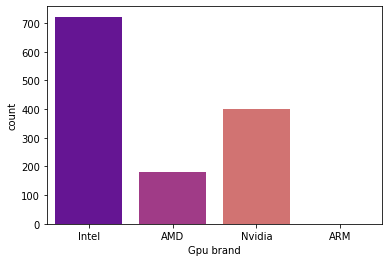

In [323]:
df['Gpu brand'] = df['Gpu'].apply(lambda x:x.split()[0])
sn.countplot(x=df['Gpu brand'],palette='plasma')

In [ ]:
# removing the "ARM" tuple

df = df[df['Gpu brand']!='ARM']
sn.countplot(x=df['Gpu brand'],palette='plasma')

In [324]:
df = df.drop(columns=['Gpu'])
df.head()

,Company,TypeName,Ram,OpSys,Weight,Price,TouchScreen,IPS,PPI,CPU_name,HDD,SSD,Gpu brand
0,Apple,Ultrabook,8,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5,0,128,Intel
1,Apple,Ultrabook,8,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5,0,0,Intel
2,HP,Notebook,8,No OS,1.86,30636.0000,0,0,141.211998,Intel Core i5,0,256,Intel
3,Apple,Ultrabook,16,macOS,1.83,135195.3360,0,1,220.534624,Intel Core i7,0,512,AMD
4,Apple,Ultrabook,8,macOS,1.37,96095.8080,0,1,226.983005,Intel Core i5,0,256,Intel


##### Operating System analysis

In [325]:
df['OpSys'].value_counts()

Windows 10      1072
No OS             66
Linux             62
Windows 7         45
Chrome OS         27
macOS             13
Mac OS X           8
Windows 10 S       8
Android            2
Name: OpSys, dtype: int64

In [ ]:
sn.barplot(x=df['OpSys'],y=df['Price'])
plt.xticks(rotation = 'vertical')
plt.show()

In [326]:
df['OpSys'].unique()

array(['macOS', 'No OS', 'Windows 10', 'Mac OS X', 'Linux', 'Android',
       'Windows 10 S', 'Chrome OS', 'Windows 7'], dtype=object)

In [327]:
# club {Windows 10,Windows 7,Windows 7 S}-->Windows
# club {macOS,mac OS X}--> mac
# else return Others

def setcategory(text):
    
    if text=='Windows 10' or text=='Windows 7' or text=='Windows 10 S':
        return 'Windows'
    
    elif text=='Mac OS X' or text=='macOS':
        return 'Mac'
    
    else:
        return 'Other'
    
    
df['OpSys'] = df['OpSys'].apply(lambda x:setcategory(x))

df.head()

,Company,TypeName,Ram,OpSys,Weight,Price,TouchScreen,IPS,PPI,CPU_name,HDD,SSD,Gpu brand
0,Apple,Ultrabook,8,Mac,1.37,71378.6832,0,1,226.983005,Intel Core i5,0,128,Intel
1,Apple,Ultrabook,8,Mac,1.34,47895.5232,0,0,127.677940,Intel Core i5,0,0,Intel
2,HP,Notebook,8,Other,1.86,30636.0000,0,0,141.211998,Intel Core i5,0,256,Intel
3,Apple,Ultrabook,16,Mac,1.83,135195.3360,0,1,220.534624,Intel Core i7,0,512,AMD
4,Apple,Ultrabook,8,Mac,1.37,96095.8080,0,1,226.983005,Intel Core i5,0,256,Intel


In [328]:
df.sample(5)#windows laptop are most common

,Company,TypeName,Ram,OpSys,Weight,Price,TouchScreen,IPS,PPI,CPU_name,HDD,SSD,Gpu brand
73,MSI,Gaming,8,Windows,2.70,58341.6000,0,0,127.335675,Intel Core i5,1000,128,Nvidia
758,Dell,Gaming,16,Windows,4.42,152859.7872,0,1,282.423996,Intel Core i7,1000,256,Nvidia
243,Dell,Gaming,8,Windows,2.56,46833.1200,0,0,141.211998,Intel Core i5,0,256,Nvidia
118,Asus,Notebook,4,Windows,2.00,30049.9200,0,0,127.335675,Intel Core i3,1000,0,Nvidia
660,Dell,Notebook,8,Windows,1.56,65481.1200,0,0,157.350512,Intel Core i5,0,256,Intel


<AxesSubplot: xlabel='OpSys', ylabel='count'>

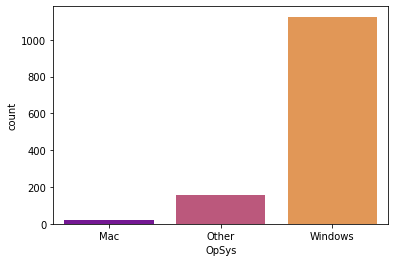

In [329]:
sn.countplot(x=df['OpSys'],palette='plasma')

(array([0, 1, 2]),
 [Text(0, 0, 'Mac'), Text(1, 0, 'Other'), Text(2, 0, 'Windows')])

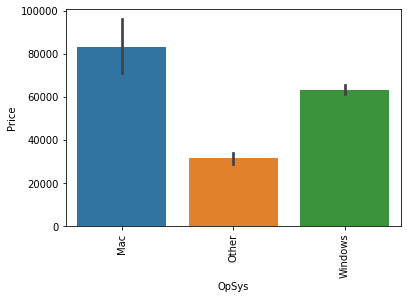

In [330]:
sn.barplot(x = df['OpSys'],y = df['Price'])
plt.xticks(rotation = 'vertical')

###### Weight analysis 

C:\Users\vivek\AppData\Local\Temp\ipykernel_18164\3649999187.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sn.distplot(df['Weight'])#since weight is continuous variable


<AxesSubplot: xlabel='Weight', ylabel='Density'>

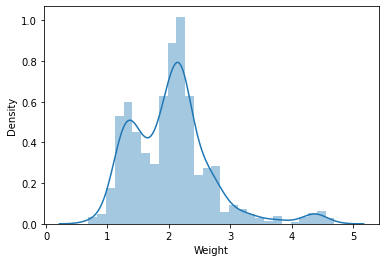

In [331]:
sn.distplot(df['Weight'])#since weight is continuous variable

<AxesSubplot: xlabel='Weight', ylabel='Price'>

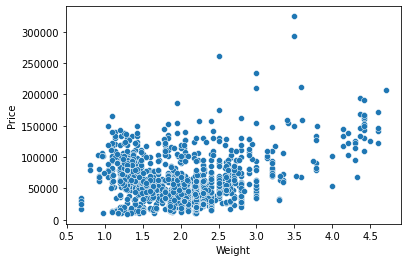

In [332]:
sn.scatterplot(x=df['Weight'],y=df['Price'])#most laptop lie in range of 1.2-2kg

##### Price Analysis

C:\Users\vivek\AppData\Local\Temp\ipykernel_18164\2580056544.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sn.distplot(df['Price'])#kind of left skewed gaussian


<AxesSubplot: xlabel='Price', ylabel='Density'>

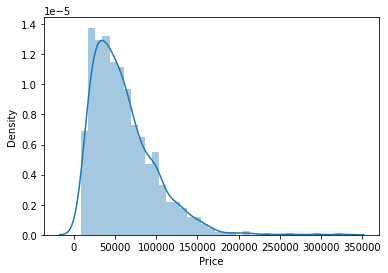

In [333]:
sn.distplot(df['Price'])#kind of left skewed gaussian

C:\Users\vivek\AppData\Local\Temp\ipykernel_18164\3594593754.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sn.distplot(np.log(df['Price']))#perfect gaussian distribution


<AxesSubplot: xlabel='Price', ylabel='Density'>

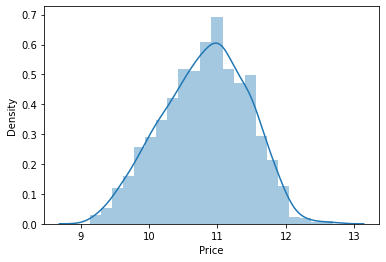

In [334]:
# so if we apply np.log to the Price col we get a gaussian distibution

sn.distplot(np.log(df['Price']))#perfect gaussian distribution

In [335]:
## correlation with price

df.corr()['Price']#now we have good correlation

C:\Users\vivek\AppData\Local\Temp\ipykernel_18164\1031726703.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()['Price']#now we have good correlation


Ram            0.743007
Weight         0.210370
Price          1.000000
TouchScreen    0.191226
IPS            0.252208
PPI            0.473487
HDD           -0.096441
SSD            0.670799
Name: Price, dtype: float64

C:\Users\vivek\AppData\Local\Temp\ipykernel_18164\4019273308.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sn.heatmap(df.corr(),annot=True,cmap='plasma')


<AxesSubplot: >

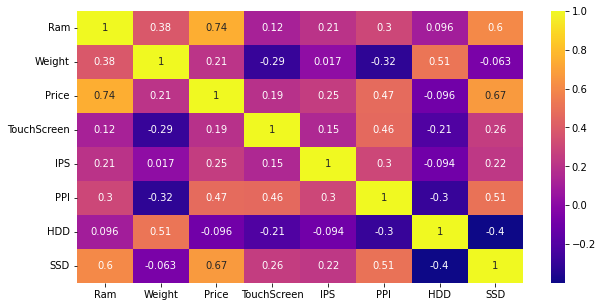

In [336]:
plt.figure(figsize=(10,5))
sn.heatmap(df.corr(),annot=True,cmap='plasma')

## Model Building

In [337]:
df.shape

(1303, 13)

In [338]:
df=pd.get_dummies(data=df,columns=['Company','TypeName','OpSys','CPU_name','Gpu brand'])

In [339]:
df

,Ram,Weight,Price,TouchScreen,IPS,PPI,HDD,SSD,Company_Acer,Company_Apple,...,OpSys_Windows,CPU_name_AMD Processor,CPU_name_Intel Core i3,CPU_name_Intel Core i5,CPU_name_Intel Core i7,CPU_name_Other Intel Processor,Gpu brand_AMD,Gpu brand_ARM,Gpu brand_Intel,Gpu brand_Nvidia
0,8,1.37,71378.6832,0,1,226.983005,0,128,0,1,...,0,0,0,1,0,0,0,0,1,0
1,8,1.34,47895.5232,0,0,127.677940,0,0,0,1,...,0,0,0,1,0,0,0,0,1,0
2,8,1.86,30636.0000,0,0,141.211998,0,256,0,0,...,0,0,0,1,0,0,0,0,1,0
3,16,1.83,135195.3360,0,1,220.534624,0,512,0,1,...,0,0,0,0,1,0,1,0,0,0
4,8,1.37,96095.8080,0,1,226.983005,0,256,0,1,...,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1298,4,1.80,33992.6400,1,1,157.350512,0,128,0,0,...,1,0,0,0,1,0,0,0,1,0
1299,16,1.30,79866.7200,1,1,276.053530,0,512,0,0,...,1,0,0,0,1,0,0,0,1,0
1300,2,1.50,12201.1200,0,0,111.935204,0,0,0,0,...,1,0,0,0,0,1,0,0,1,0
1301,6,2.19,40705.9200,0,0,100.454670,1000,0,0,0,...,1,0,0,0,1,0,1,0,0,0


In [340]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor


In [341]:
from sklearn.model_selection import train_test_split

In [343]:
y=df['Price']
X=df.drop('Price',axis=1)

In [381]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.10,random_state=34)


# LinearRegression

In [370]:
lr=LinearRegression()
lr.fit(X_train,y_train)
prediction=lr.predict(X_test)

In [371]:
from sklearn.metrics import r2_score

r2_score(y_test, prediction)

0.7347976417875138

# RandomForest

In [372]:
Rf=RandomForestRegressor()
Rf.fit(X_train,y_train)
prediction_2=Rf.predict(X_test)
r2_score(y_test,prediction_2)


0.7481627428498325

# DecisionTreeRegression

In [373]:
from sklearn.tree import DecisionTreeRegressor


In [374]:
dc=DecisionTreeRegressor()
dc.fit(X_train,y_train)
prediction_3=dc.predict(X_test)
r2_score(y_test,prediction_3)

0.6145352138613016

# Hyperparameter_Tuning

In [375]:
from sklearn.model_selection import RandomizedSearchCV
RandomForestRegressor()

RandomForestRegressor()

In [358]:
random_grid = {
    'n_estimators': [int(x) for x in np.linspace(100,1200,10)],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth': [int(x) for x in np.linspace(1,30,5)],
    'min_samples_split': [2,5,10,14],
    'min_samples_leaf': [2,5,10,14],
    'ccp_alpha':[x for x in np.linspace(0.0025,0.0125,5)],
    'criterion':['absolute_error', 'squared_error', 'friedman_mse', 'poisson']
}

In [359]:
rf_randomcv=RandomizedSearchCV(estimator=Rf,param_distributions=random_grid,n_iter=100,cv=3,verbose=2)
rf_randomcv.fit(X_train,y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits
[CV] END ccp_alpha=0.01, criterion=friedman_mse, max_depth=1, max_features=log2, min_samples_leaf=14, min_samples_split=5, n_estimators=222; total time=   0.1s
[CV] END ccp_alpha=0.01, criterion=friedman_mse, max_depth=1, max_features=log2, min_samples_leaf=14, min_samples_split=5, n_estimators=222; total time=   0.1s
[CV] END ccp_alpha=0.01, criterion=friedman_mse, max_depth=1, max_features=log2, min_samples_leaf=14, min_samples_split=5, n_estimators=222; total time=   0.1s
[CV] END ccp_alpha=0.005, criterion=absolute_error, max_depth=22, max_features=log2, min_samples_leaf=5, min_samples_split=10, n_estimators=344; total time=   0.7s
[CV] END ccp_alpha=0.005, criterion=absolute_error, max_depth=22, max_features=log2, min_samples_leaf=5, min_samples_split=10, n_estimators=344; total time=   0.6s
[CV] END ccp_alpha=0.005, criterion=absolute_error, max_depth=22, max_features=log2, min_samples_leaf=5, min_samples_split=10, n_

C:\Users\vivek\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END ccp_alpha=0.0125, criterion=absolute_error, max_depth=15, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=711; total time=   7.1s


C:\Users\vivek\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END ccp_alpha=0.0125, criterion=absolute_error, max_depth=15, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=711; total time=   7.3s


C:\Users\vivek\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END ccp_alpha=0.0125, criterion=absolute_error, max_depth=15, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=711; total time=   7.1s


C:\Users\vivek\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END ccp_alpha=0.0075, criterion=friedman_mse, max_depth=30, max_features=auto, min_samples_leaf=14, min_samples_split=2, n_estimators=1200; total time=   1.6s


C:\Users\vivek\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END ccp_alpha=0.0075, criterion=friedman_mse, max_depth=30, max_features=auto, min_samples_leaf=14, min_samples_split=2, n_estimators=1200; total time=   1.7s


C:\Users\vivek\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END ccp_alpha=0.0075, criterion=friedman_mse, max_depth=30, max_features=auto, min_samples_leaf=14, min_samples_split=2, n_estimators=1200; total time=   1.6s
[CV] END ccp_alpha=0.0025, criterion=friedman_mse, max_depth=8, max_features=log2, min_samples_leaf=10, min_samples_split=14, n_estimators=100; total time=   0.0s
[CV] END ccp_alpha=0.0025, criterion=friedman_mse, max_depth=8, max_features=log2, min_samples_leaf=10, min_samples_split=14, n_estimators=100; total time=   0.0s
[CV] END ccp_alpha=0.0025, criterion=friedman_mse, max_depth=8, max_features=log2, min_samples_leaf=10, min_samples_split=14, n_estimators=100; total time=   0.0s
[CV] END ccp_alpha=0.0075, criterion=friedman_mse, max_depth=15, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=588; total time=   0.5s
[CV] END ccp_alpha=0.0075, criterion=friedman_mse, max_depth=15, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=588; total time=   0.6s
[CV] END ccp_alpha=0.00

C:\Users\vivek\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END ccp_alpha=0.0125, criterion=poisson, max_depth=15, max_features=auto, min_samples_leaf=14, min_samples_split=10, n_estimators=466; total time=   0.6s


C:\Users\vivek\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END ccp_alpha=0.0125, criterion=poisson, max_depth=15, max_features=auto, min_samples_leaf=14, min_samples_split=10, n_estimators=466; total time=   0.6s


C:\Users\vivek\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END ccp_alpha=0.0125, criterion=poisson, max_depth=15, max_features=auto, min_samples_leaf=14, min_samples_split=10, n_estimators=466; total time=   0.6s
[CV] END ccp_alpha=0.0075, criterion=friedman_mse, max_depth=22, max_features=sqrt, min_samples_leaf=14, min_samples_split=14, n_estimators=711; total time=   0.6s
[CV] END ccp_alpha=0.0075, criterion=friedman_mse, max_depth=22, max_features=sqrt, min_samples_leaf=14, min_samples_split=14, n_estimators=711; total time=   0.6s
[CV] END ccp_alpha=0.0075, criterion=friedman_mse, max_depth=22, max_features=sqrt, min_samples_leaf=14, min_samples_split=14, n_estimators=711; total time=   0.6s
[CV] END ccp_alpha=0.01, criterion=absolute_error, max_depth=15, max_features=sqrt, min_samples_leaf=5, min_samples_split=14, n_estimators=711; total time=   1.5s
[CV] END ccp_alpha=0.01, criterion=absolute_error, max_depth=15, max_features=sqrt, min_samples_leaf=5, min_samples_split=14, n_estimators=711; total time=   1.5s
[CV] END ccp_alpha=0.01

C:\Users\vivek\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\Users\vivek\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END ccp_alpha=0.005, criterion=squared_error, max_depth=1, max_features=auto, min_samples_leaf=5, min_samples_split=10, n_estimators=100; total time=   0.0s
[CV] END ccp_alpha=0.005, criterion=squared_error, max_depth=1, max_features=auto, min_samples_leaf=5, min_samples_split=10, n_estimators=100; total time=   0.0s


C:\Users\vivek\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END ccp_alpha=0.0075, criterion=friedman_mse, max_depth=8, max_features=log2, min_samples_leaf=14, min_samples_split=2, n_estimators=344; total time=   0.3s
[CV] END ccp_alpha=0.0075, criterion=friedman_mse, max_depth=8, max_features=log2, min_samples_leaf=14, min_samples_split=2, n_estimators=344; total time=   0.2s
[CV] END ccp_alpha=0.0075, criterion=friedman_mse, max_depth=8, max_features=log2, min_samples_leaf=14, min_samples_split=2, n_estimators=344; total time=   0.3s
[CV] END ccp_alpha=0.005, criterion=poisson, max_depth=22, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=833; total time=   0.9s
[CV] END ccp_alpha=0.005, criterion=poisson, max_depth=22, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=833; total time=   0.9s
[CV] END ccp_alpha=0.005, criterion=poisson, max_depth=22, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=833; total time=   0.9s
[CV] END ccp_alpha=0.01, criterion=friedman_ms

C:\Users\vivek\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END ccp_alpha=0.0125, criterion=friedman_mse, max_depth=22, max_features=auto, min_samples_leaf=2, min_samples_split=14, n_estimators=833; total time=   1.3s


C:\Users\vivek\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END ccp_alpha=0.0125, criterion=friedman_mse, max_depth=22, max_features=auto, min_samples_leaf=2, min_samples_split=14, n_estimators=833; total time=   1.3s


C:\Users\vivek\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END ccp_alpha=0.0125, criterion=friedman_mse, max_depth=22, max_features=auto, min_samples_leaf=2, min_samples_split=14, n_estimators=833; total time=   1.3s


C:\Users\vivek\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END ccp_alpha=0.0025, criterion=friedman_mse, max_depth=22, max_features=auto, min_samples_leaf=14, min_samples_split=10, n_estimators=711; total time=   0.9s


C:\Users\vivek\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END ccp_alpha=0.0025, criterion=friedman_mse, max_depth=22, max_features=auto, min_samples_leaf=14, min_samples_split=10, n_estimators=711; total time=   0.9s


C:\Users\vivek\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END ccp_alpha=0.0025, criterion=friedman_mse, max_depth=22, max_features=auto, min_samples_leaf=14, min_samples_split=10, n_estimators=711; total time=   0.9s
[CV] END ccp_alpha=0.0075, criterion=poisson, max_depth=15, max_features=auto, min_samples_leaf=10, min_samples_split=5, n_estimators=100; total time=   0.1s


C:\Users\vivek\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\Users\vivek\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END ccp_alpha=0.0075, criterion=poisson, max_depth=15, max_features=auto, min_samples_leaf=10, min_samples_split=5, n_estimators=100; total time=   0.1s
[CV] END ccp_alpha=0.0075, criterion=poisson, max_depth=15, max_features=auto, min_samples_leaf=10, min_samples_split=5, n_estimators=100; total time=   0.1s


C:\Users\vivek\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\Users\vivek\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END ccp_alpha=0.0075, criterion=squared_error, max_depth=30, max_features=auto, min_samples_leaf=14, min_samples_split=10, n_estimators=1077; total time=   1.4s


C:\Users\vivek\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END ccp_alpha=0.0075, criterion=squared_error, max_depth=30, max_features=auto, min_samples_leaf=14, min_samples_split=10, n_estimators=1077; total time=   1.4s


C:\Users\vivek\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END ccp_alpha=0.0075, criterion=squared_error, max_depth=30, max_features=auto, min_samples_leaf=14, min_samples_split=10, n_estimators=1077; total time=   1.4s
[CV] END ccp_alpha=0.0125, criterion=absolute_error, max_depth=1, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=466; total time=   0.5s
[CV] END ccp_alpha=0.0125, criterion=absolute_error, max_depth=1, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=466; total time=   0.5s
[CV] END ccp_alpha=0.0125, criterion=absolute_error, max_depth=1, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=466; total time=   0.5s


C:\Users\vivek\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END ccp_alpha=0.005, criterion=absolute_error, max_depth=1, max_features=auto, min_samples_leaf=10, min_samples_split=14, n_estimators=466; total time=   1.2s


C:\Users\vivek\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END ccp_alpha=0.005, criterion=absolute_error, max_depth=1, max_features=auto, min_samples_leaf=10, min_samples_split=14, n_estimators=466; total time=   1.2s


C:\Users\vivek\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END ccp_alpha=0.005, criterion=absolute_error, max_depth=1, max_features=auto, min_samples_leaf=10, min_samples_split=14, n_estimators=466; total time=   1.2s
[CV] END ccp_alpha=0.01, criterion=squared_error, max_depth=15, max_features=sqrt, min_samples_leaf=5, min_samples_split=10, n_estimators=466; total time=   0.4s
[CV] END ccp_alpha=0.01, criterion=squared_error, max_depth=15, max_features=sqrt, min_samples_leaf=5, min_samples_split=10, n_estimators=466; total time=   0.4s
[CV] END ccp_alpha=0.01, criterion=squared_error, max_depth=15, max_features=sqrt, min_samples_leaf=5, min_samples_split=10, n_estimators=466; total time=   0.4s
[CV] END ccp_alpha=0.01, criterion=absolute_error, max_depth=15, max_features=log2, min_samples_leaf=14, min_samples_split=14, n_estimators=466; total time=   0.7s
[CV] END ccp_alpha=0.01, criterion=absolute_error, max_depth=15, max_features=log2, min_samples_leaf=14, min_samples_split=14, n_estimators=466; total time=   0.7s
[CV] END ccp_alpha=0.0

C:\Users\vivek\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END ccp_alpha=0.01, criterion=absolute_error, max_depth=8, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=344; total time=   3.1s


C:\Users\vivek\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END ccp_alpha=0.01, criterion=absolute_error, max_depth=8, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=344; total time=   3.3s


C:\Users\vivek\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END ccp_alpha=0.01, criterion=absolute_error, max_depth=8, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=344; total time=   3.2s
[CV] END ccp_alpha=0.005, criterion=absolute_error, max_depth=15, max_features=sqrt, min_samples_leaf=10, min_samples_split=10, n_estimators=833; total time=   1.6s
[CV] END ccp_alpha=0.005, criterion=absolute_error, max_depth=15, max_features=sqrt, min_samples_leaf=10, min_samples_split=10, n_estimators=833; total time=   1.6s
[CV] END ccp_alpha=0.005, criterion=absolute_error, max_depth=15, max_features=sqrt, min_samples_leaf=10, min_samples_split=10, n_estimators=833; total time=   1.5s
[CV] END ccp_alpha=0.005, criterion=poisson, max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=14, n_estimators=588; total time=   0.6s
[CV] END ccp_alpha=0.005, criterion=poisson, max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=14, n_estimators=588; total time=   0.6s
[CV] END ccp_alpha=0.005, crit

C:\Users\vivek\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END ccp_alpha=0.0125, criterion=absolute_error, max_depth=22, max_features=auto, min_samples_leaf=10, min_samples_split=10, n_estimators=833; total time=   4.8s


C:\Users\vivek\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END ccp_alpha=0.0125, criterion=absolute_error, max_depth=22, max_features=auto, min_samples_leaf=10, min_samples_split=10, n_estimators=833; total time=   4.9s


C:\Users\vivek\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END ccp_alpha=0.0125, criterion=absolute_error, max_depth=22, max_features=auto, min_samples_leaf=10, min_samples_split=10, n_estimators=833; total time=   4.9s
[CV] END ccp_alpha=0.005, criterion=absolute_error, max_depth=30, max_features=log2, min_samples_leaf=5, min_samples_split=5, n_estimators=1077; total time=   2.2s
[CV] END ccp_alpha=0.005, criterion=absolute_error, max_depth=30, max_features=log2, min_samples_leaf=5, min_samples_split=5, n_estimators=1077; total time=   2.1s
[CV] END ccp_alpha=0.005, criterion=absolute_error, max_depth=30, max_features=log2, min_samples_leaf=5, min_samples_split=5, n_estimators=1077; total time=   2.1s
[CV] END ccp_alpha=0.0125, criterion=absolute_error, max_depth=22, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=711; total time=   1.8s
[CV] END ccp_alpha=0.0125, criterion=absolute_error, max_depth=22, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=711; total time=   1.7s
[CV] END ccp_a

C:\Users\vivek\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END ccp_alpha=0.0025, criterion=absolute_error, max_depth=22, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=955; total time=   9.1s


C:\Users\vivek\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END ccp_alpha=0.0025, criterion=absolute_error, max_depth=22, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=955; total time=   9.3s


C:\Users\vivek\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END ccp_alpha=0.0025, criterion=absolute_error, max_depth=22, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=955; total time=   9.1s


C:\Users\vivek\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END ccp_alpha=0.0075, criterion=absolute_error, max_depth=15, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=222; total time=   2.1s


C:\Users\vivek\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END ccp_alpha=0.0075, criterion=absolute_error, max_depth=15, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=222; total time=   2.1s


C:\Users\vivek\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END ccp_alpha=0.0075, criterion=absolute_error, max_depth=15, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=222; total time=   2.0s
[CV] END ccp_alpha=0.005, criterion=absolute_error, max_depth=8, max_features=sqrt, min_samples_leaf=14, min_samples_split=2, n_estimators=1077; total time=   1.8s
[CV] END ccp_alpha=0.005, criterion=absolute_error, max_depth=8, max_features=sqrt, min_samples_leaf=14, min_samples_split=2, n_estimators=1077; total time=   1.8s
[CV] END ccp_alpha=0.005, criterion=absolute_error, max_depth=8, max_features=sqrt, min_samples_leaf=14, min_samples_split=2, n_estimators=1077; total time=   1.9s
[CV] END ccp_alpha=0.0075, criterion=squared_error, max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=588; total time=   0.6s
[CV] END ccp_alpha=0.0075, criterion=squared_error, max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=588; total time=   0.6s
[CV] END ccp_al

C:\Users\vivek\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END ccp_alpha=0.0125, criterion=squared_error, max_depth=1, max_features=auto, min_samples_leaf=10, min_samples_split=5, n_estimators=222; total time=   0.4s


C:\Users\vivek\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END ccp_alpha=0.0125, criterion=squared_error, max_depth=1, max_features=auto, min_samples_leaf=10, min_samples_split=5, n_estimators=222; total time=   0.3s


C:\Users\vivek\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END ccp_alpha=0.0125, criterion=squared_error, max_depth=1, max_features=auto, min_samples_leaf=10, min_samples_split=5, n_estimators=222; total time=   0.2s
[CV] END ccp_alpha=0.01, criterion=poisson, max_depth=8, max_features=sqrt, min_samples_leaf=14, min_samples_split=14, n_estimators=344; total time=   0.3s
[CV] END ccp_alpha=0.01, criterion=poisson, max_depth=8, max_features=sqrt, min_samples_leaf=14, min_samples_split=14, n_estimators=344; total time=   0.3s
[CV] END ccp_alpha=0.01, criterion=poisson, max_depth=8, max_features=sqrt, min_samples_leaf=14, min_samples_split=14, n_estimators=344; total time=   0.3s
[CV] END ccp_alpha=0.0125, criterion=poisson, max_depth=30, max_features=sqrt, min_samples_leaf=10, min_samples_split=2, n_estimators=588; total time=   0.8s
[CV] END ccp_alpha=0.0125, criterion=poisson, max_depth=30, max_features=sqrt, min_samples_leaf=10, min_samples_split=2, n_estimators=588; total time=   0.8s
[CV] END ccp_alpha=0.0125, criterion=poisson, max_dep

C:\Users\vivek\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END ccp_alpha=0.0125, criterion=squared_error, max_depth=8, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=711; total time=   1.1s


C:\Users\vivek\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END ccp_alpha=0.0125, criterion=squared_error, max_depth=8, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=711; total time=   1.1s


C:\Users\vivek\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END ccp_alpha=0.0125, criterion=squared_error, max_depth=8, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=711; total time=   1.1s
[CV] END ccp_alpha=0.0075, criterion=squared_error, max_depth=22, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=955; total time=   1.1s
[CV] END ccp_alpha=0.0075, criterion=squared_error, max_depth=22, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=955; total time=   1.1s
[CV] END ccp_alpha=0.0075, criterion=squared_error, max_depth=22, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=955; total time=   1.1s
[CV] END ccp_alpha=0.0025, criterion=poisson, max_depth=22, max_features=log2, min_samples_leaf=14, min_samples_split=5, n_estimators=466; total time=   0.4s
[CV] END ccp_alpha=0.0025, criterion=poisson, max_depth=22, max_features=log2, min_samples_leaf=14, min_samples_split=5, n_estimators=466; total time=   0.4s
[CV] END ccp_alpha=0.0025, criter

C:\Users\vivek\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\Users\vivek\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END ccp_alpha=0.01, criterion=squared_error, max_depth=15, max_features=auto, min_samples_leaf=14, min_samples_split=10, n_estimators=100; total time=   0.0s
[CV] END ccp_alpha=0.01, criterion=squared_error, max_depth=15, max_features=auto, min_samples_leaf=14, min_samples_split=10, n_estimators=100; total time=   0.0s


C:\Users\vivek\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END ccp_alpha=0.0075, criterion=poisson, max_depth=15, max_features=log2, min_samples_leaf=5, min_samples_split=14, n_estimators=711; total time=   0.7s
[CV] END ccp_alpha=0.0075, criterion=poisson, max_depth=15, max_features=log2, min_samples_leaf=5, min_samples_split=14, n_estimators=711; total time=   0.7s
[CV] END ccp_alpha=0.0075, criterion=poisson, max_depth=15, max_features=log2, min_samples_leaf=5, min_samples_split=14, n_estimators=711; total time=   0.7s
[CV] END ccp_alpha=0.01, criterion=absolute_error, max_depth=1, max_features=sqrt, min_samples_leaf=10, min_samples_split=14, n_estimators=1200; total time=   1.7s
[CV] END ccp_alpha=0.01, criterion=absolute_error, max_depth=1, max_features=sqrt, min_samples_leaf=10, min_samples_split=14, n_estimators=1200; total time=   1.5s
[CV] END ccp_alpha=0.01, criterion=absolute_error, max_depth=1, max_features=sqrt, min_samples_leaf=10, min_samples_split=14, n_estimators=1200; total time=   2.3s


C:\Users\vivek\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END ccp_alpha=0.0125, criterion=poisson, max_depth=8, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=833; total time=   1.8s


C:\Users\vivek\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END ccp_alpha=0.0125, criterion=poisson, max_depth=8, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=833; total time=   1.8s


C:\Users\vivek\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END ccp_alpha=0.0125, criterion=poisson, max_depth=8, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=833; total time=   1.7s
[CV] END ccp_alpha=0.0025, criterion=absolute_error, max_depth=8, max_features=log2, min_samples_leaf=5, min_samples_split=2, n_estimators=1200; total time=   2.8s
[CV] END ccp_alpha=0.0025, criterion=absolute_error, max_depth=8, max_features=log2, min_samples_leaf=5, min_samples_split=2, n_estimators=1200; total time=   2.7s
[CV] END ccp_alpha=0.0025, criterion=absolute_error, max_depth=8, max_features=log2, min_samples_leaf=5, min_samples_split=2, n_estimators=1200; total time=   2.4s
[CV] END ccp_alpha=0.0025, criterion=friedman_mse, max_depth=1, max_features=sqrt, min_samples_leaf=2, min_samples_split=14, n_estimators=344; total time=   0.2s
[CV] END ccp_alpha=0.0025, criterion=friedman_mse, max_depth=1, max_features=sqrt, min_samples_leaf=2, min_samples_split=14, n_estimators=344; total time=   0.2s
[CV] END ccp_alpha=0.0025, c

C:\Users\vivek\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END ccp_alpha=0.0025, criterion=friedman_mse, max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=833; total time=   1.7s


C:\Users\vivek\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END ccp_alpha=0.0025, criterion=friedman_mse, max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=833; total time=   1.8s


C:\Users\vivek\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END ccp_alpha=0.0025, criterion=friedman_mse, max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=833; total time=   1.7s
[CV] END ccp_alpha=0.0125, criterion=poisson, max_depth=22, max_features=log2, min_samples_leaf=5, min_samples_split=14, n_estimators=100; total time=   0.0s
[CV] END ccp_alpha=0.0125, criterion=poisson, max_depth=22, max_features=log2, min_samples_leaf=5, min_samples_split=14, n_estimators=100; total time=   0.0s
[CV] END ccp_alpha=0.0125, criterion=poisson, max_depth=22, max_features=log2, min_samples_leaf=5, min_samples_split=14, n_estimators=100; total time=   0.0s
[CV] END ccp_alpha=0.005, criterion=absolute_error, max_depth=30, max_features=sqrt, min_samples_leaf=14, min_samples_split=5, n_estimators=344; total time=   0.5s
[CV] END ccp_alpha=0.005, criterion=absolute_error, max_depth=30, max_features=sqrt, min_samples_leaf=14, min_samples_split=5, n_estimators=344; total time=   0.6s
[CV] END ccp_alpha=0.005, criterion=

C:\Users\vivek\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END ccp_alpha=0.0025, criterion=friedman_mse, max_depth=1, max_features=auto, min_samples_leaf=14, min_samples_split=2, n_estimators=711; total time=   0.7s


C:\Users\vivek\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END ccp_alpha=0.0025, criterion=friedman_mse, max_depth=1, max_features=auto, min_samples_leaf=14, min_samples_split=2, n_estimators=711; total time=   0.7s


C:\Users\vivek\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END ccp_alpha=0.0025, criterion=friedman_mse, max_depth=1, max_features=auto, min_samples_leaf=14, min_samples_split=2, n_estimators=711; total time=   0.7s


C:\Users\vivek\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END ccp_alpha=0.005, criterion=absolute_error, max_depth=15, max_features=auto, min_samples_leaf=10, min_samples_split=2, n_estimators=1200; total time=   7.3s


C:\Users\vivek\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END ccp_alpha=0.005, criterion=absolute_error, max_depth=15, max_features=auto, min_samples_leaf=10, min_samples_split=2, n_estimators=1200; total time=   7.6s


C:\Users\vivek\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END ccp_alpha=0.005, criterion=absolute_error, max_depth=15, max_features=auto, min_samples_leaf=10, min_samples_split=2, n_estimators=1200; total time=   7.8s


C:\Users\vivek\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END ccp_alpha=0.0025, criterion=squared_error, max_depth=22, max_features=auto, min_samples_leaf=5, min_samples_split=10, n_estimators=1200; total time=   2.0s


C:\Users\vivek\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END ccp_alpha=0.0025, criterion=squared_error, max_depth=22, max_features=auto, min_samples_leaf=5, min_samples_split=10, n_estimators=1200; total time=   2.0s


C:\Users\vivek\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END ccp_alpha=0.0025, criterion=squared_error, max_depth=22, max_features=auto, min_samples_leaf=5, min_samples_split=10, n_estimators=1200; total time=   2.1s
[CV] END ccp_alpha=0.0125, criterion=poisson, max_depth=1, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1077; total time=   1.0s
[CV] END ccp_alpha=0.0125, criterion=poisson, max_depth=1, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1077; total time=   1.0s
[CV] END ccp_alpha=0.0125, criterion=poisson, max_depth=1, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1077; total time=   1.0s
[CV] END ccp_alpha=0.0125, criterion=absolute_error, max_depth=1, max_features=log2, min_samples_leaf=5, min_samples_split=5, n_estimators=100; total time=   0.0s
[CV] END ccp_alpha=0.0125, criterion=absolute_error, max_depth=1, max_features=log2, min_samples_leaf=5, min_samples_split=5, n_estimators=100; total time=   0.1s
[CV] END ccp_alpha=0.0125, criterio

C:\Users\vivek\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END ccp_alpha=0.0075, criterion=squared_error, max_depth=8, max_features=auto, min_samples_leaf=10, min_samples_split=5, n_estimators=466; total time=   0.6s


C:\Users\vivek\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END ccp_alpha=0.0075, criterion=squared_error, max_depth=8, max_features=auto, min_samples_leaf=10, min_samples_split=5, n_estimators=466; total time=   0.6s


C:\Users\vivek\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END ccp_alpha=0.0075, criterion=squared_error, max_depth=8, max_features=auto, min_samples_leaf=10, min_samples_split=5, n_estimators=466; total time=   0.6s


C:\Users\vivek\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END ccp_alpha=0.005, criterion=friedman_mse, max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=344; total time=   0.7s


C:\Users\vivek\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END ccp_alpha=0.005, criterion=friedman_mse, max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=344; total time=   0.8s


C:\Users\vivek\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END ccp_alpha=0.005, criterion=friedman_mse, max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=344; total time=   0.7s
[CV] END ccp_alpha=0.01, criterion=squared_error, max_depth=15, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=1200; total time=   2.2s
[CV] END ccp_alpha=0.01, criterion=squared_error, max_depth=15, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=1200; total time=   1.7s
[CV] END ccp_alpha=0.01, criterion=squared_error, max_depth=15, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=1200; total time=   1.6s
[CV] END ccp_alpha=0.01, criterion=friedman_mse, max_depth=8, max_features=sqrt, min_samples_leaf=10, min_samples_split=2, n_estimators=1077; total time=   1.2s
[CV] END ccp_alpha=0.01, criterion=friedman_mse, max_depth=8, max_features=sqrt, min_samples_leaf=10, min_samples_split=2, n_estimators=1077; total time=   1.2s
[CV] END ccp_alpha=0.01, criter

C:\Users\vivek\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END ccp_alpha=0.005, criterion=poisson, max_depth=30, max_features=auto, min_samples_leaf=5, min_samples_split=10, n_estimators=833; total time=   1.5s


C:\Users\vivek\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END ccp_alpha=0.005, criterion=poisson, max_depth=30, max_features=auto, min_samples_leaf=5, min_samples_split=10, n_estimators=833; total time=   1.5s


C:\Users\vivek\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END ccp_alpha=0.005, criterion=poisson, max_depth=30, max_features=auto, min_samples_leaf=5, min_samples_split=10, n_estimators=833; total time=   1.5s
[CV] END ccp_alpha=0.0025, criterion=friedman_mse, max_depth=1, max_features=sqrt, min_samples_leaf=5, min_samples_split=14, n_estimators=222; total time=   0.1s
[CV] END ccp_alpha=0.0025, criterion=friedman_mse, max_depth=1, max_features=sqrt, min_samples_leaf=5, min_samples_split=14, n_estimators=222; total time=   0.1s
[CV] END ccp_alpha=0.0025, criterion=friedman_mse, max_depth=1, max_features=sqrt, min_samples_leaf=5, min_samples_split=14, n_estimators=222; total time=   0.1s


C:\Users\vivek\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END ccp_alpha=0.005, criterion=squared_error, max_depth=22, max_features=auto, min_samples_leaf=5, min_samples_split=10, n_estimators=588; total time=   0.9s


C:\Users\vivek\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END ccp_alpha=0.005, criterion=squared_error, max_depth=22, max_features=auto, min_samples_leaf=5, min_samples_split=10, n_estimators=588; total time=   0.9s


C:\Users\vivek\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END ccp_alpha=0.005, criterion=squared_error, max_depth=22, max_features=auto, min_samples_leaf=5, min_samples_split=10, n_estimators=588; total time=   1.1s
[CV] END ccp_alpha=0.01, criterion=poisson, max_depth=22, max_features=log2, min_samples_leaf=10, min_samples_split=5, n_estimators=1077; total time=   1.2s
[CV] END ccp_alpha=0.01, criterion=poisson, max_depth=22, max_features=log2, min_samples_leaf=10, min_samples_split=5, n_estimators=1077; total time=   1.2s
[CV] END ccp_alpha=0.01, criterion=poisson, max_depth=22, max_features=log2, min_samples_leaf=10, min_samples_split=5, n_estimators=1077; total time=   1.2s
[CV] END ccp_alpha=0.0075, criterion=squared_error, max_depth=8, max_features=sqrt, min_samples_leaf=5, min_samples_split=14, n_estimators=588; total time=   0.6s
[CV] END ccp_alpha=0.0075, criterion=squared_error, max_depth=8, max_features=sqrt, min_samples_leaf=5, min_samples_split=14, n_estimators=588; total time=   0.6s
[CV] END ccp_alpha=0.0075, criterion=squ

C:\Users\vivek\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


RandomizedSearchCV(cv=3,
                   estimator=RandomForestRegressor(max_depth=12, max_features=1,
                                                   max_samples=0.5,
                                                   random_state=4),
                   n_iter=100,
                   param_distributions={'ccp_alpha': [0.0025, 0.005, 0.0075,
                                                      0.01, 0.0125],
                                        'criterion': ['absolute_error',
                                                      'squared_error',
                                                      'friedman_mse',
                                                      'poisson'],
                                        'max_depth': [1, 8, 15, 22, 30],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': [2, 5, 10, 14],
                                        'min_samples_split': [2, 5, 10, 14],
                                        'n_estimators': [100, 222, 344, 466,
                                                         588, 711, 833, 955,
                                                         1077, 1200]},
                   verbose=2)

In [376]:
rf_randomcv.best_params_

{'n_estimators': 344,
 'min_samples_split': 2,
 'min_samples_leaf': 2,
 'max_features': 'auto',
 'max_depth': 30,
 'criterion': 'friedman_mse',
 'ccp_alpha': 0.005}

In [361]:
rf_randomcv

RandomizedSearchCV(cv=3,
                   estimator=RandomForestRegressor(max_depth=12, max_features=1,
                                                   max_samples=0.5,
                                                   random_state=4),
                   n_iter=100,
                   param_distributions={'ccp_alpha': [0.0025, 0.005, 0.0075,
                                                      0.01, 0.0125],
                                        'criterion': ['absolute_error',
                                                      'squared_error',
                                                      'friedman_mse',
                                                      'poisson'],
                                        'max_depth': [1, 8, 15, 22, 30],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': [2, 5, 10, 14],
                                        'min_samples_split': [2, 5, 10, 14],
                                        'n_estimators': [100, 222, 344, 466,
                                                         588, 711, 833, 955,
                                                         1077, 1200]},
                   verbose=2)

In [382]:
best_random_grid=rf_randomcv.best_estimator_
best_random_grid

RandomForestRegressor(ccp_alpha=0.005, criterion='friedman_mse', max_depth=30,
                      max_features='auto', max_samples=0.5, min_samples_leaf=2,
                      n_estimators=344, random_state=4)

In [383]:
y_pred=best_random_grid.predict(X_test)
r2_score(y_test,y_pred)

0.816701009231263